<a href="https://colab.research.google.com/github/mohdfaazkhan/Machine-Learning/blob/main/lasso_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Eliminating Multicollinearity from your Dataset using Lasso regression (Regularization)**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import warnings
from google.colab import drive
from mpl_toolkits import mplot3d
from pylab import rcParams
from scipy import stats
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
     

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.expand_frame_repr', False)
rcParams['figure.figsize'] = 14, 7

In [3]:
from google.colab import files
 
uploaded = files.upload()

Saving training_data_lesso.txt to training_data_lesso.txt


In [5]:
df = pd.read_csv("training_data_lesso.txt")

In [6]:

df.head()
     

,X1,X2,y
0,458.7,458.7,1187.0
1,488.5,488.5,1149.1
2,588.3,588.3,1268.3
3,613.3,613.3,1124.9
4,606.7,606.7,1194.5


In [7]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))
     

Total number of rows in dataset = 155
Total number of columns in dataset = 3


AttributeError: ignored

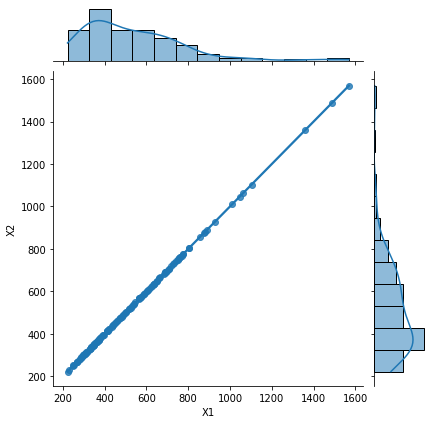

In [14]:

j = sns.jointplot("X1", "X2", data = df, kind = 'reg')
j.annotate(stats.pearsonr)
plt.show()

In [15]:
target_col = "y"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

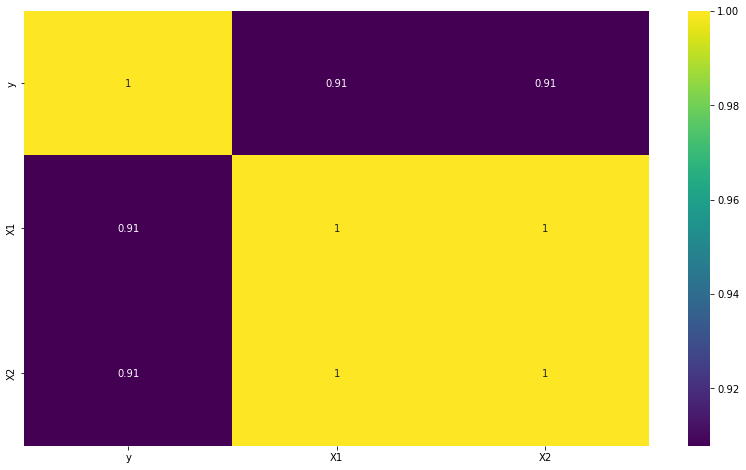

In [16]:

k = 3 #number of variables for heatmap
cols = df.corr().nlargest(k, target_col)[target_col].index
cm = df[cols].corr()
plt.figure(figsize=(14,8))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [17]:

X_with_constant = sm.add_constant(X)
model = sm.OLS(y, X_with_constant)
     

In [18]:

results = model.fit()
print(results.summary())
     

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     717.3
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           1.24e-59
Time:                        08:12:26   Log-Likelihood:                -1026.0
No. Observations:                 155   AIC:                             2056.
Df Residuals:                     153   BIC:                             2062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.2964     36.565      0.747      0.4

In [19]:
lasso = Lasso()
params = {"alpha" : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 1e1, 
                     1e2, 1e3, 1e4, 1e5, 1e6, 1e7]}
     

In [20]:
lasso_regressor = GridSearchCV(lasso, params, 
                               scoring="neg_mean_squared_error", 
                               cv=5)

In [21]:

lasso_regressor.fit(X, y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   10.0, 100.0, 1000.0, 10000.0, 100000.0,
                                   1000000.0, 10000000.0]},
             scoring='neg_mean_squared_error')

In [22]:

lasso_regressor.best_score_

-61484.23850071816

In [23]:

lasso_regressor.best_estimator_

Lasso(alpha=10000.0)

In [24]:
lasso_best = lasso_regressor.best_estimator_

In [25]:

lasso_best.fit(X, y)

Lasso(alpha=10000.0)

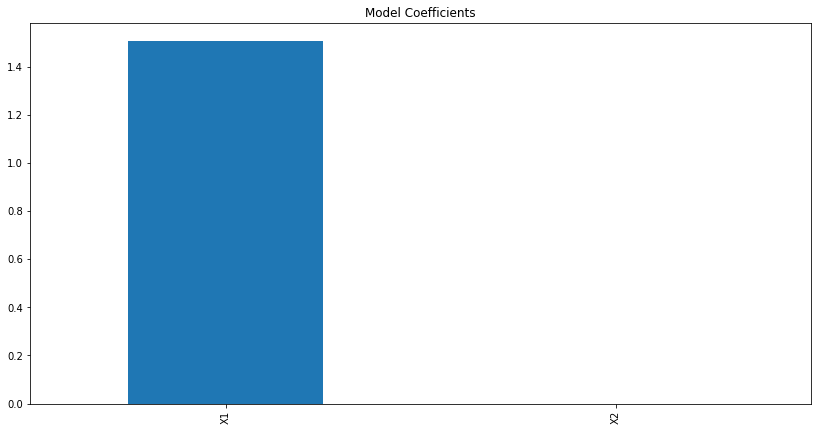

In [26]:
coef = pd.Series(lasso_best.coef_,list(X.columns))
coef.plot(kind='bar', title='Model Coefficients')